In [1]:
# standard imports
import numpy as np
from numpy.random import randn
import pandas as pd
# stats
from scipy import stats
# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# see plots in notebook
%matplotlib inline

In [2]:
flight_dframe = sns.load_dataset('flights')

In [3]:
flight_dframe.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
# col to row, column, values
flight_dframe = flight_dframe.pivot('month','year','passengers')

In [20]:
flight_dframe
flight_dframe.columns.name

'year'

<AxesSubplot:xlabel='year', ylabel='month'>

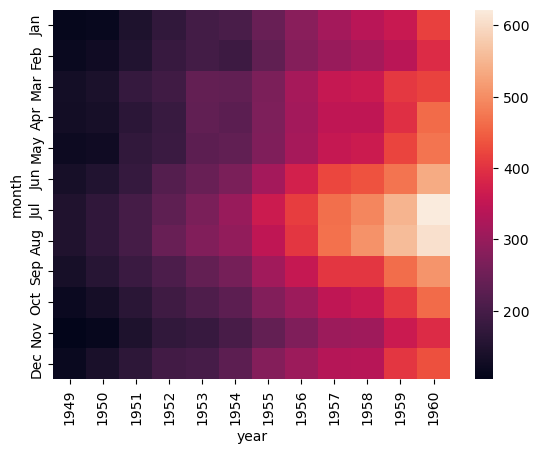

In [6]:
sns.heatmap(flight_dframe)

<AxesSubplot:xlabel='year', ylabel='month'>

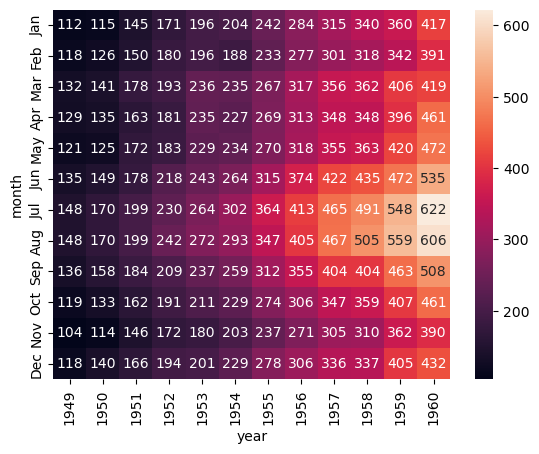

In [27]:
sns.heatmap(flight_dframe, annot=True, fmt='d')

<AxesSubplot:xlabel='year', ylabel='month'>

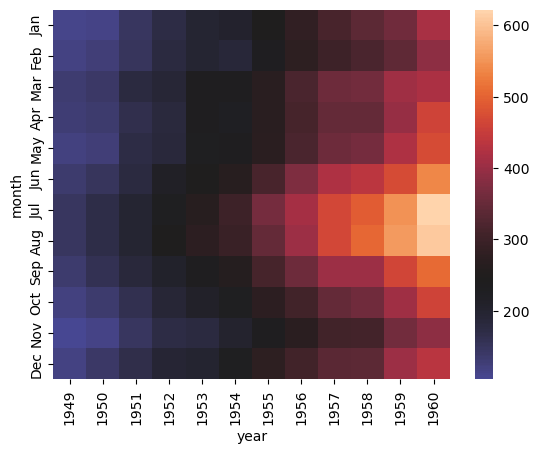

In [25]:
# We can choose our own centers
sns.heatmap(flight_dframe,center=flight_dframe.loc['Jan',1955])

<AxesSubplot:xlabel='year', ylabel='month'>

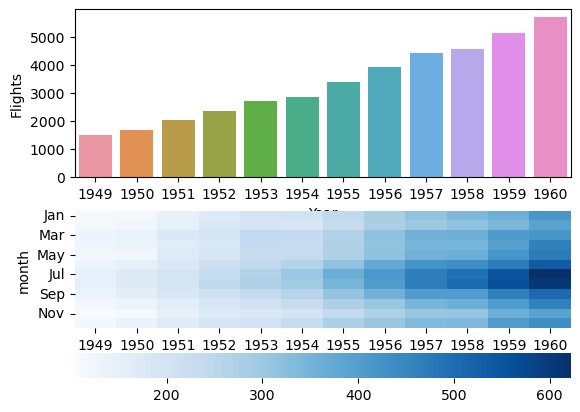

In [26]:
# Figure with multiple subplots
f, (axis1,axis2) =  plt.subplots(2,1)
# Taking the sum of each column, sum being the total flights of each year
yearly_flights = flight_dframe.sum()
years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']

sns.barplot(x='Year',y='Flights',data=year_dframe,ax=axis1)
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={'orientation':'horizontal'})

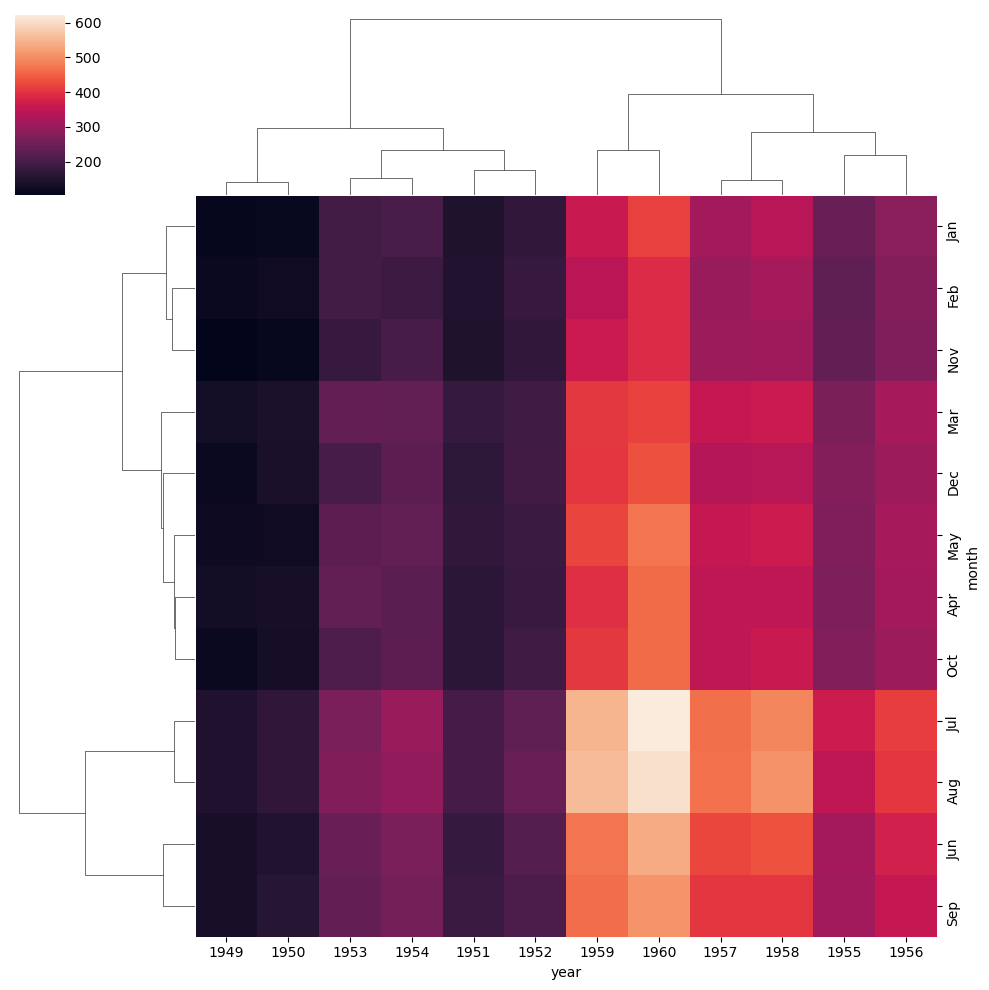

In [27]:
# Cluster map, reformats heat map so that similar rows are next to each other
sns.clustermap(flight_dframe)
# Months and Years are no longer in order, similar months/years are clustered together

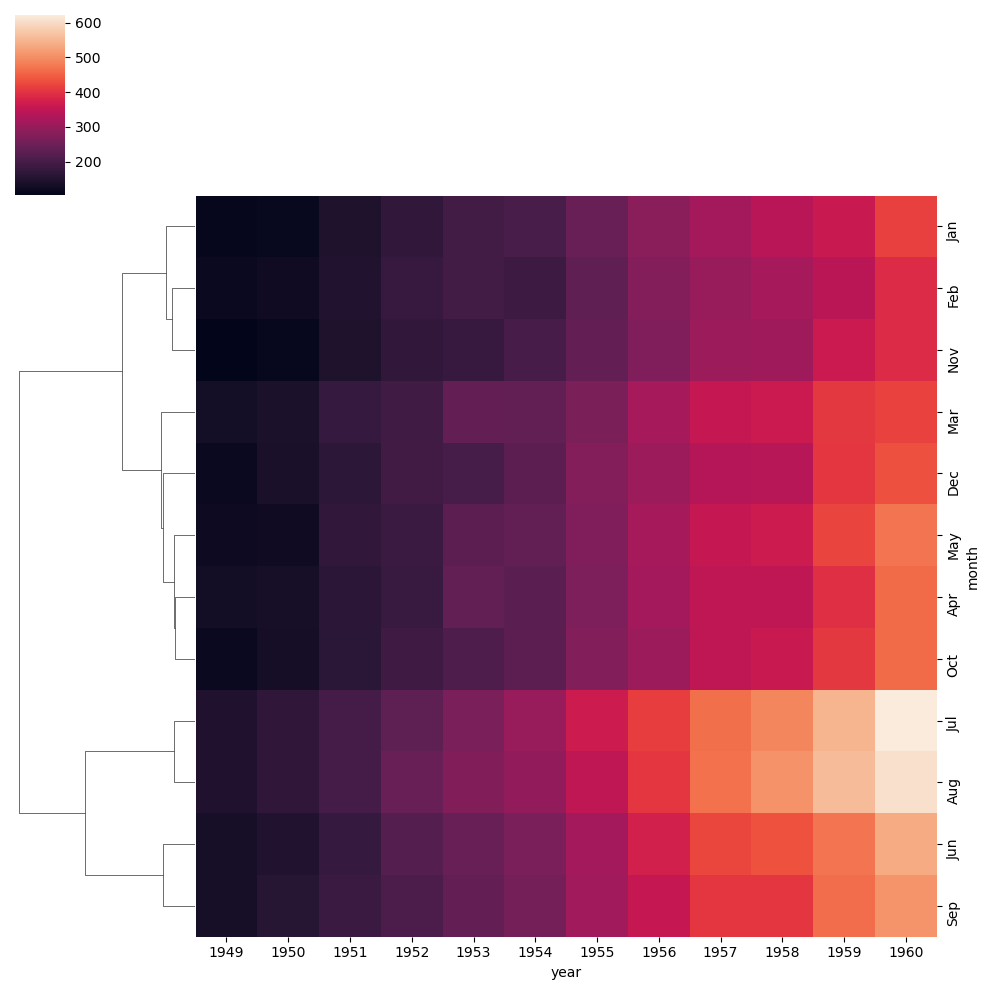

In [28]:
# Only cluster the months (rows)
sns.clustermap(flight_dframe, col_cluster=False)

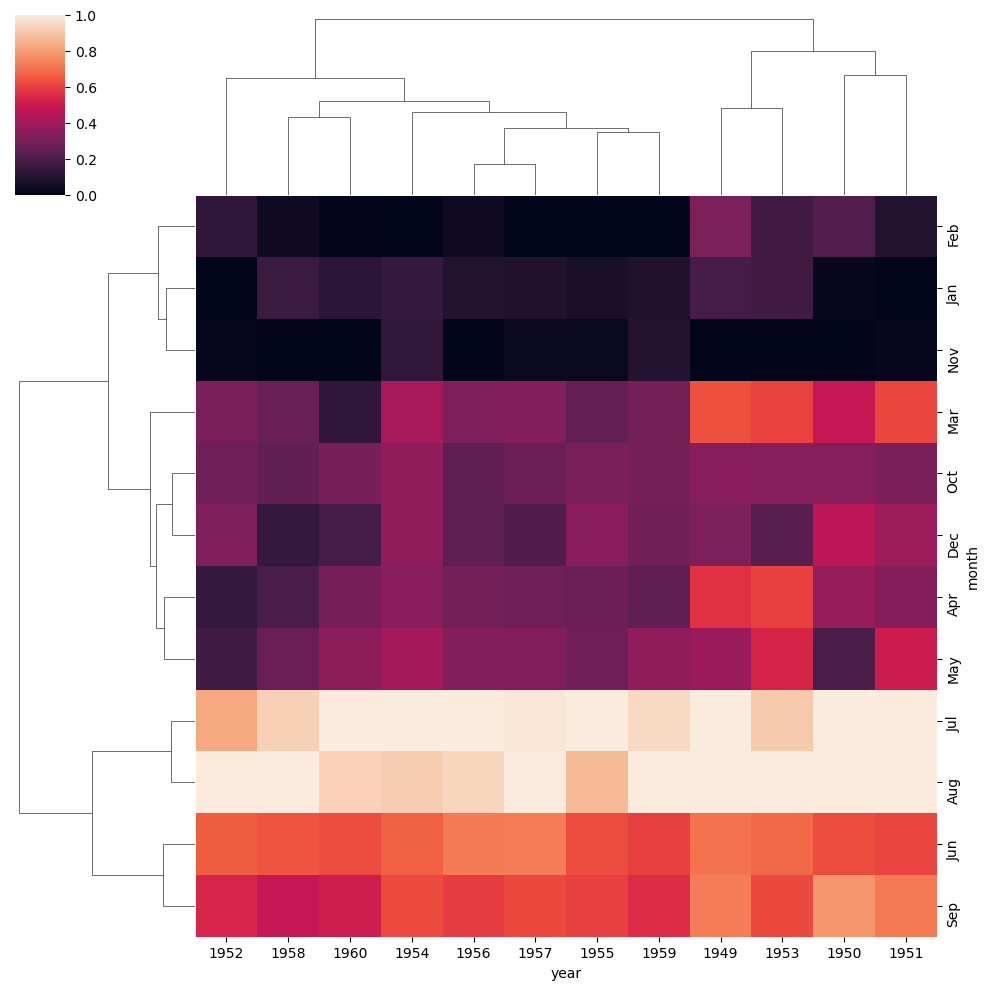

In [29]:
# Standardize since # of flights is increasing every year, standardize based on year
sns.clustermap(flight_dframe, standard_scale=1)

In [30]:
# Shows that the summer months have the highest amounts of flights!

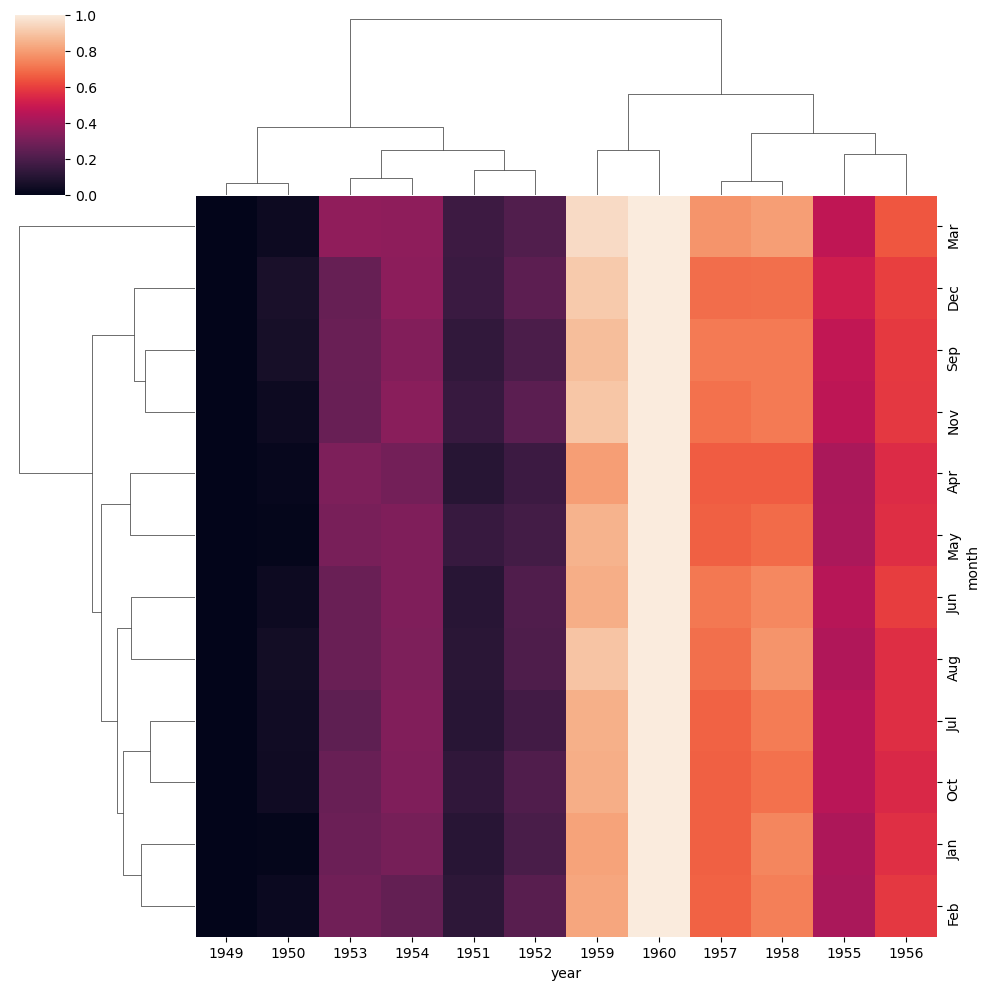

In [31]:
sns.clustermap(flight_dframe,standard_scale=0)
# Standardize by the months

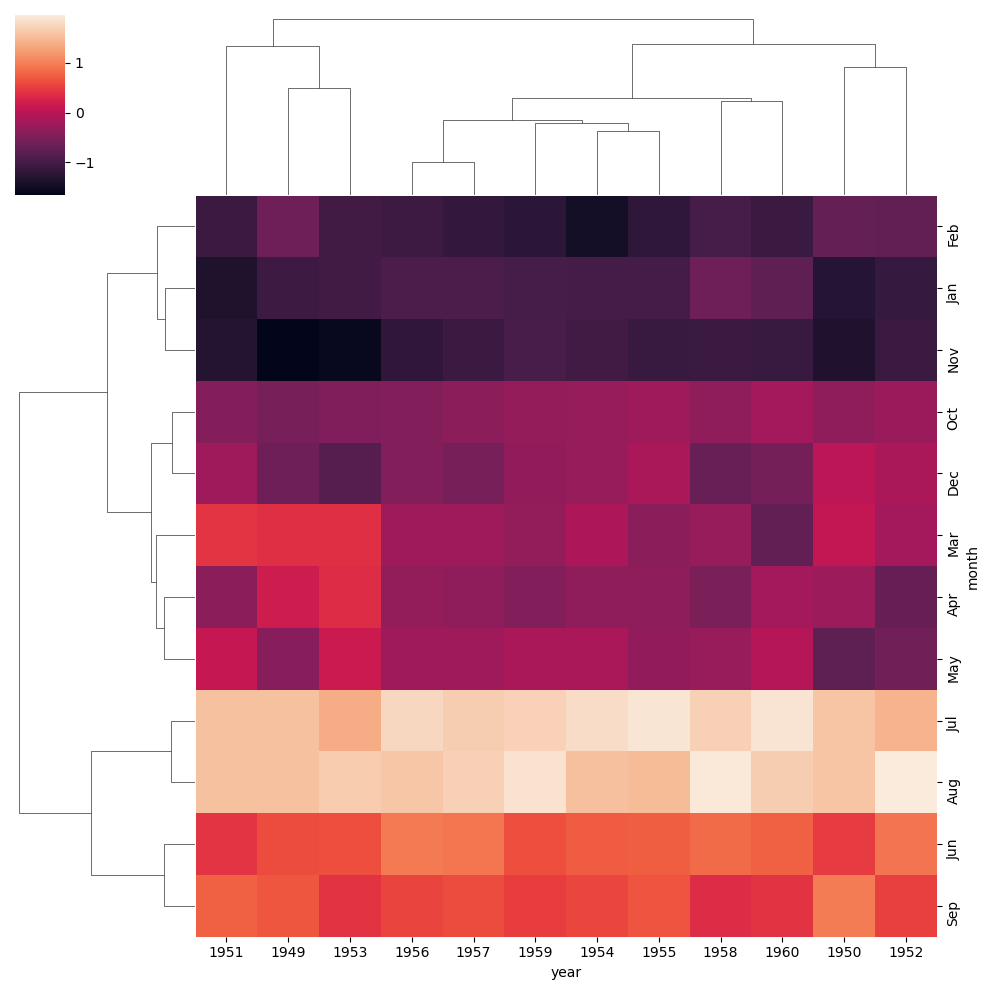

In [32]:
# Makes the mean 0 and variance by 1
sns.clustermap(flight_dframe,z_score=1)